# Machine Learning With Scikit-Learn

## Data Representation in Scikit-Learn

In [1]:
# import iris dataset
import seaborn as sns
iris = sns.load_dataset('iris')  # genrerates a dataframe of iris df
# check the data
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> Each row refer to a sample and we have `n_samples` and each column is a feature, so we have `n_features`

### Feature Matrix
The feature matrix is thought of as a 2D array or matrix with shape [n_samples, n_features]

### Target Array

The target array or label (often called y) has length n_samples and is usually a 1D array. It can be continous or discrete. It is better thought of as the *dependent variable*

Example: We can use the iris data to create a model that predicts the species of flowers (target) based on some measurements (features)

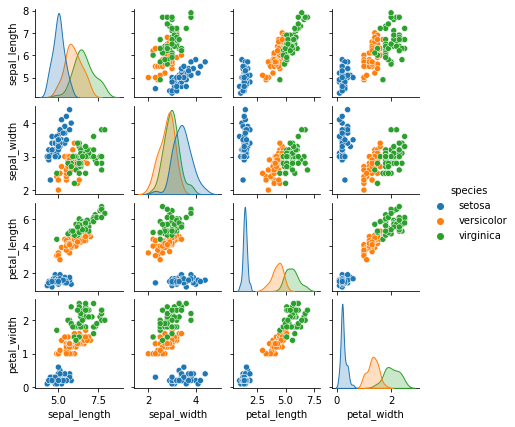

In [2]:
# Top level visualization of the data with Seaborn
%matplotlib inline
sns.pairplot(iris, hue='species', height=1.5)

In [4]:
# Get the features matrix fro iris
X_iris = iris.drop('species', axis=1)  # drops the target array
X_iris.shape

(150, 4)

In [5]:
# get the target array
y_iris = iris['species']
y_iris.shape

(150,)

## Supervised Learning Example


In [6]:
#### Step 1: Data Splitting and Feature Selection

In [7]:
# Step 1: Split data into training and testing set
from sklearn.model_selection import train_test_split  # for data splitting
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris, random_state=1)

In [8]:
Xtrain.shape

(112, 4)

In [9]:
Xtest.shape

(38, 4)

In [10]:
Xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1
75,6.6,3.0,4.4,1.4
16,5.4,3.9,1.3,0.4
131,7.9,3.8,6.4,2.0


#### Step 2: Predict Model
1. Select a model class
2. Instantiate Model Hyperparameter

In [11]:
# selcting a model
from sklearn.naive_bayes import GaussianNB  # 1. choose model class
model = GaussianNB()                        # 2. Instantiate model
model.fit(Xtrain, ytrain)                   # fit model
y_model = model.predict(Xtest)              # Predict on new data

#### Step 3: Check Model Accuracy
Using the appropriate module in the sklearn.metric library

In [13]:
# import accuracy_score utility
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)             # check how the predicted value perform compared to the origin labels

0.9736842105263158

We have a 97% with this naive classification for this dataset

## Unsupervised Learning Example: Iris Dimensionality

Our iris dataset is currently 4D. That is there are 4 features recorded for each sameple. 

The task of **Dimensionality Reduction** is to determine whether there are suitable lower dimensional representations that retains the essential features of the data. Dimensionality Reduction is often used as an aid to visulize the data in lower dimensions like 2D instead of 4D or more


For this example we will use the `principal component analysis` which is a fast linear dimentionality reduction technique.

In [14]:
# import PCA
from sklearn.decomposition import PCA            # 1. choose model
model = PCA(n_components=2)                      # 2. instantiate model
model.fit(X_iris)                                # 3. fit model to data
X_2D = model.transform(X_iris)                   # 4. transform the data

Now, lets plot the result. Best way is to insert the results into the original Iris dataframe and use Seaborm lmplot to show the results

In [16]:
# looking into the reduced data
X_2D.shape

(150, 2)

In [19]:
type(X_2D)

numpy.ndarray

In [15]:
sns.lmplot?

Signature:
sns.lmplot(
    *,
    x=None,
    y=None,
    data=None,
    hue=None,
    col=None,
    row=None,
    palette=None,
    col_wrap=None,
    height=5,
    aspect=1,
    markers='o',
    sharex=None,
    sharey=None,
    hue_order=None,
    col_order=None,
    row_order=None,
    legend=True,
    legend_out=None,
    x_estimator=None,
    x_bins=None,
    x_ci='ci',
    scatter=True,
    fit_reg=True,
    ci=95,
    n_boot=1000,
    units=None,
    seed=None,
    order=1,
    logistic=False,
    lowess=False,
    robust=False,
    logx=False,
    x_partial=None,
    y_partial=None,
    truncate=True,
    x_jitter=None,
    y_jitter=None,
    scatter_kws=None,
    line_kws=None,
    facet_kws=None,
    size=None,
)
Docstring:
Plot data and regression model fits across a FacetGrid.

This function combines :func:`regplot` and :class:`FacetGrid`. It is
intended as a convenient interface to fit regression models across
conditional subsets of a dataset.

When thinking about how to 

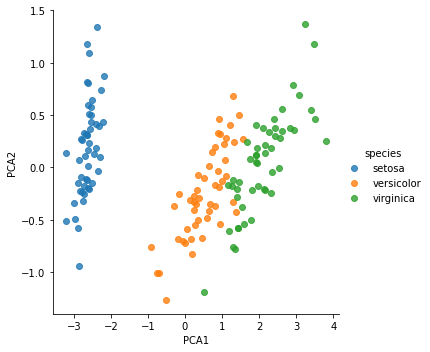

In [20]:
# insert into iris
iris['PCA1'] = X_2D[:, 0]  # first col of X_2D
iris['PCA2'] = X_2D[:, 1]  # second col of X_2D

# plot the data
sns.lmplot(data=iris, x='PCA1', y='PCA2', hue='species', fit_reg=False);

We projected the data to two dimensions and the species are fairly seprated even though the PCA algorithm had no knowledge of the species label. Fantastic 😃!

## Unsupervised Learning: Iris Clustering
A **clustering algorithm** tries to find distinct groups of data without reference to any labels. 

We will use a powerful clustering technique called a Gaussian mixture model (GMM) here. It attempts to model data as a collection of Gaussian blobs.

In [21]:
# import GMM
from sklearn.mixture import GaussianMixture     # select model class
model = GaussianMixture(n_components=3,
                       covariance_type='full')  # instantiate model
model.fit(X_iris)                               # fit model to data
y_gmm = model.predict(X_iris)                   # determine labels or groups

In [22]:
# look into the output
type(y_gmm)

numpy.ndarray

In [24]:
y_gmm.shape  # its a row matrix. 

(150,)

In [33]:
import numpy as np
np.unique(y_gmm)

array([0, 1, 2], dtype=int64)

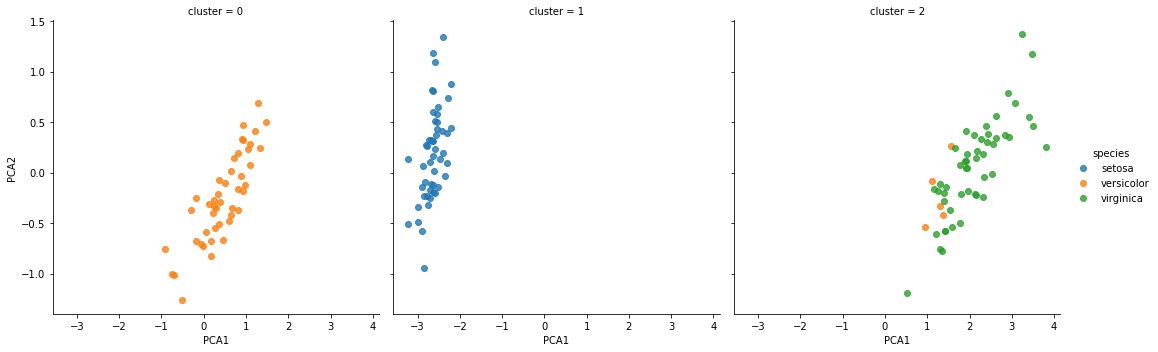

In [25]:
# Plot the data with sns
iris['cluster'] = y_gmm     # add the cluster label to the original data
sns.lmplot(x='PCA1', y='PCA2', hue='species', col='cluster', data=iris, fit_reg=False);

By splitting the data into clusters we see how the GMMalgorithm has recovered the underpying labels. Setosa was perfectly splitted within cluster 1 while there remains a small amount of mixing between versicolor and virginica

## Handwritten Digits Problem

In [34]:
# load dataset
from sklearn.datasets import load_digits
digits = load_digits()

# look into it
digits.images.shape

(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. Let’s visualize the first hundred of these

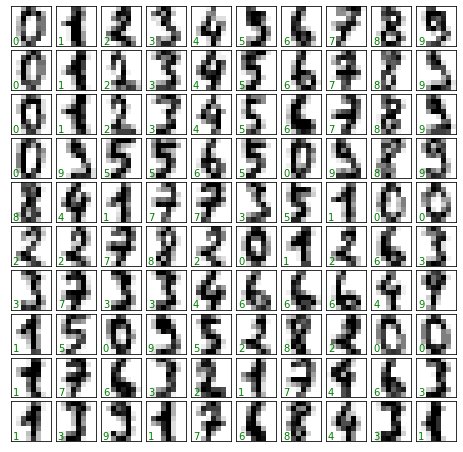

In [37]:
import matplotlib.pyplot as plt

# use the object oriented technique
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))

# plot
for index, ax in enumerate(axes.flat):
    ax.imshow(digits.images[index], cmap='binary', interpolation='nearest')
    ax.text(.05, .05, str(digits.target[index]),
           transform=ax.transAxes, color='green');

In order to work with this data within Scikit-Learn, we need a two-dimensional, `[n_samples, n_features]` representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the data and target attributes, respectively:

In [38]:
# getting the features samples
X = digits.data
X.shape

(1797, 64)

In [39]:
y = digits.target
y.shape

(1797,)

> We see here that there are 1,797 samples and 64 features.

### Unsupervised Learning Example: Dimensionality Reduction

We’d like to visualize our points within the 64-dimensional parameter space, but it’s difficult to effectively visualize points in such a high-dimensional space. Instead, we’ll reduce the number of dimensions, using an unsupervised method. Here, we’ll make use of a manifold learning algorithm called Isomap

In [40]:
# import the Isopmap module
from sklearn.manifold import Isomap        # 1. select model class
iso = Isomap(n_components=2)               # 2. instantiate model
iso.fit(X)                                 # 3. fit model to data
X_projected = iso.transform(X)             # 4. Transform data

print(X_projected.shape)

C:\Users\mobol\anaconda3\lib\site-packages\sklearn\manifold\_isomap.py:304: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\mobol\anaconda3\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)


We see that the projected data is now two-dimensional. Let’s plot this data to see if we can learn anything from its structure

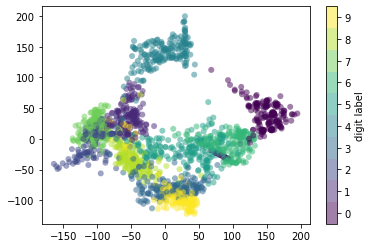

In [41]:
# plotting
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=digits.target,
           edgecolors='none', alpha=.5, cmap=plt.cm.get_cmap('viridis', 10))

# plot colorbar
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on Digits

Applying the classification algorithm to the digit data

In [42]:
# split data
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

# check data
print(Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape)

(1347, 64) (450, 64) (1347,) (450,)


In [43]:
# fitting model to data using the GaussianNB
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

Now that we have the model’s predictions, we can gauge its accuracy by comparing the true values of the test set to the predictions:

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

In [46]:
# just looking at the y_model and y_test

In [48]:
type(y_model) == type(ytest)

True

With even this very simple model, we find about 83% accuracy for classification of the digits!

However, this single number doesn’t tell us where we’ve gone wrong. One nice way to do this is to use the confusion matrix, which we can compute with Scikit-Learn and plot with Seaborn

### Confusion Matrix

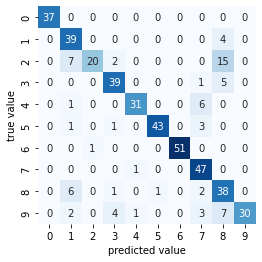

In [49]:
# import the confusion matrix module
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

# plot in sns
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap='Blues')
plt.xlabel('predicted value')
plt.ylabel('true value');

Another way to gain intuition into the characteristics of the model is to plot the inputs again, with their predicted labels. We’ll use green for correct labels and red for incorrect labels

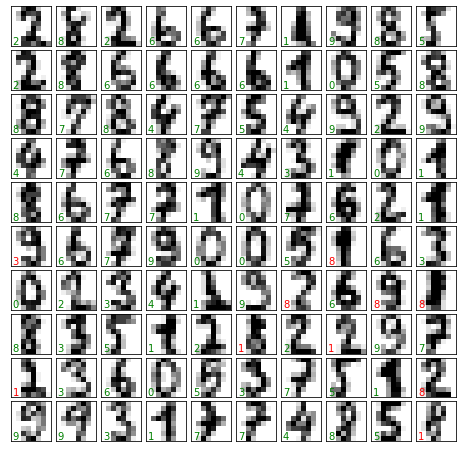

In [50]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                                  subplot_kw={'xticks':[], 'yticks':[]},
                                  gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
             ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
             ax.text(0.05, 0.05, str(y_model[i]),
                     transform=ax.transAxes,
                     color='green' if (ytest[i] == y_model[i]) else 'red')

# Chapter 39: Hyperparameters and Model Validation

- Choose a class of model.

- Choose model hyperparameters.

- Fit the model to the training data.

- Use the model to predict labels for new data or tranform data

## Model Validation the Wrong Way


In [51]:
# loading the dat
from sklearn.datasets import load_iris
# select the features
iris = load_iris()
X = iris.data
y = iris.target

#### using the KNN classifier with n-neighbors=1.

This is a very simple and intuitive model that says “the label of an unknown point is the same as the label of its closest training point”

In [52]:
from sklearn.neighbors import KNeighborsClassifier    # KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)           # instantiate model

In [53]:
model.fit(X, y)   # fit model
y_model = model.predict(X)  # use model to predict

In [54]:
# check model accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

> This approach contains a fundamental flaw: it trains and evaluates the model on the same data. Furthermore, this nearest neighbor model is an instance-based estimator that simply stores the training data, and predicts labels by comparing new data to these stored points: except in contrived cases, it will get 100% accuracy every time!

## Model Validation the Right Way: Holdout Sets

A better sense of a model’s performance can be found by using what’s known as a holdout set: that is, we hold back some subset of the data from the training of the model, and then use this holdout set to check the model’s performance. This can be done using the `train_test_split` utility in Scikit-Learn:

In [55]:
# import train_test_split
from sklearn.model_selection import train_test_split
# split the data with 50% in each set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.5)

# fit the model with the trained data
model.fit(X_train, y_train)

# evaluate the model on the test data
y_model = model.predict(X_test)

# calculate the accuracy between the expected and predicted targets
accuracy_score(y_test, y_model)

0.9066666666666666

> We see here a more reasonable result: the one-nearest-neighbor classifier is about 90% accurate on this holdout set. The holdout set is similar to unknown data, because the model has not “seen” it before.

### Model Validation via Cross-Validation

- using *two-fold cross-validation*
- using *`cross_val_score`* convenience routine
- using *leave_one_out* cross-validation

#### Two-fold Cross Validation

This alternately use each half of the data as a holdout (training/validation) set. Using the split data from earlier, we could implement it like this

In [56]:
# carrying out two-fold cv
y1_model = model.fit(X_train, y_train).predict(X_test)
y2_model = model.fit(X_test, y_test).predict(X_train)

# find aaccuracy
accuracy_score(y_test, y1_model), accuracy_score(y_train, y2_model)

(0.9066666666666666, 0.96)

What comes out are two accuracy scores, which we could combine (by, say, taking the mean) to get a better measure of the global model performance. This particular form of cross-validation is a two-fold cross-validation—that is, one in which we have split the data into two sets and used each in turn as a validation set.

#### cross_val_score Utility

We can split the data into five groups and use each in turn to evaluate the model fit on the other four-fifths of the data. This would be rather tedious to do by hand, but we can use Scikit-Learn’s `cross_val_score` convenience routine to do it succinctly:

In [57]:
# import cross_val_score util
from sklearn.model_selection import cross_val_score
# use the util
cross_val_score(model, X, y, cv=5)  # cv=5 indicate thay the model should be fitted and validated in 5 groups instance

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

#### Leave one out

For example, we might wish to go to the extreme case in which our number of folds is equal to the number of data points: that is, we train on all points but one in each trial. This type of cross-validation is known as leave-one-out cross validation, and can be used as follows

In [58]:
# import util
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())

# check the scores
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Because we have 150 samples, the leave-one-out cross-validation yields scores for 150 trials, and each score indicates either a successful (1.0) or an unsuccessful (0.0) prediction. Taking the mean of these gives an estimate of the error rate:

In [59]:
np.mean(scores)

0.96

In [62]:
np.arange(21)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

## Validation Curves in Scikit-Learn

Let's look at using cross-validation to compute the validation curve for a class of models. Here we will work with the `polynomial regression` model

- In Scikit-Learn, we can implement this with a linear regression classifier combined with the polynomial preprocessor.
- We will use a pipeline to string these operations together

In [1]:
# get the polynomial feature
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

# create a function that allows us apply the polynomial regression to a sample set
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [19]:
# creating some data to fit the model with
import numpy as np
# create data creation function
def make_data(N, err=1.0, seed=1):
    '''This function generates an array of N samples using the numpy generator and a seed of 1'''
    # randomly sample data
    rng = np.random.RandomState(seed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err *rng.randn(N)
    return X, y

# create the data
X, y = make_data(40)

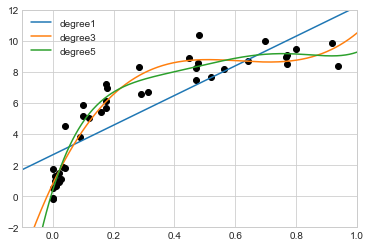

In [3]:
# We can visulaize the data along with polynomial fit of different degrees
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y , color='black')
axis = plt.axis

for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label ='degree{0}'.format(degree))
    plt.axis([-0.1, 1.0, -2, 12])
    plt.legend(loc='best')

A useful question to answer is this: what degree of polynomial provides a suitable trade-off between bias (underfitting) and variance (overfitting)?

> We can make progress in this by visualizing the validation curve for this particular data and model; this can be done straightforwardly using the validation_curve convenience routine provided by Scikit-Learn. Given a model, data, parameter name, and a range to explore, this function will automatically compute both the training score and the validation score across the range

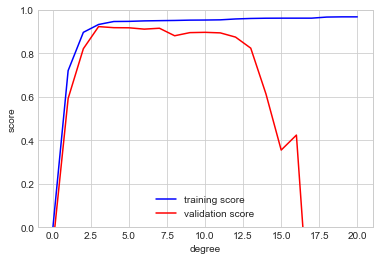

In [7]:
from sklearn.model_selection import validation_curve
degree = np.arange(0, 21) 

# split data
train_score, val_score = validation_curve(
    PolynomialRegression(), X, y,
    param_name='polynomialfeatures__degree',
    param_range=degree, cv=7)

plt.plot(degree, np.median(train_score, 1),
        color='blue', label='training score')

plt.plot(degree, np.median(val_score, 1),
        color='red', label='validation score')

plt.legend(loc='best')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

This shows precisely the qualitative behavior we expect: the training score is everywhere higher than the validation score, the training score is monotonically improving with increased model complexity, and the validation score reaches a maximum before dropping off as the model becomes overfit.

> From the validation curve, we can determine that the optimal trade-off between bias and variance is found for a third-order polynomial. We can compute and display this fit over the original data as follows

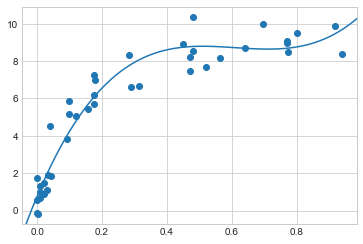

In [8]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)  # fitting a cubic degree model which appears to be the optimal

plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

Notice that finding this optimal model did not actually require us to compute the training score, but examining the relationship between the training score and validation score can give us useful insight into the performance of the model.

## Learning Curve

One important aspect of model complexity is that the optimal model will generally depend on the size of your training data.

In [24]:
# For example, let's generate a new dataset with many points
X2, y2 = make_data(200)

# look into the data
print(X2.shape, y2.shape)

(200, 1) (200,)


<AxesSubplot:>

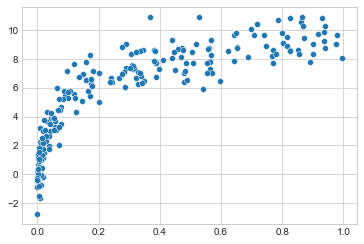

In [25]:
import seaborn as sns
sns.scatterplot(x= X2.ravel(), y= y2)

> Now let’s duplicate the preceding code to plot the validation curve for this larger dataset; for reference, we’ll overplot the previous results as well

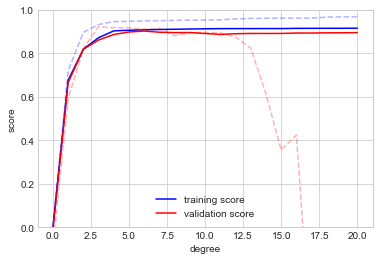

In [32]:
degree = np.arange(21)

# get the train scores and validation scores for the different degrees
train_score2, val_score2 = validation_curve(PolynomialRegression(),
                                           X2, y2,
                                            param_name="polynomialfeatures__degree",
                                            param_range=degree,
                                           cv=7)

# plot the rates
plt.plot(degree, np.median(train_score2, 1),
        color='blue', label="training score")

plt.plot(degree, np.median(val_score2, 1),
        color='red', label='validation score')

plt.plot(degree, np.median(train_score, 1),
                  color='blue', alpha=0.3, linestyle='dashed')

plt.plot(degree, np.median(val_score, 1),
      color='red', alpha=0.3, linestyle='dashed')

plt.legend(loc='lower center')
plt.ylim(0, 1)
plt.xlabel('degree')
plt.ylabel('score');

## Learning Curve Computation Using Scikit-Learn

Scikit-Learn offers a convenient utility for computing such learning curves from your models; here we will compute a learning curve for our original dataset with a second-order polynomial model and a ninth-order polynomial

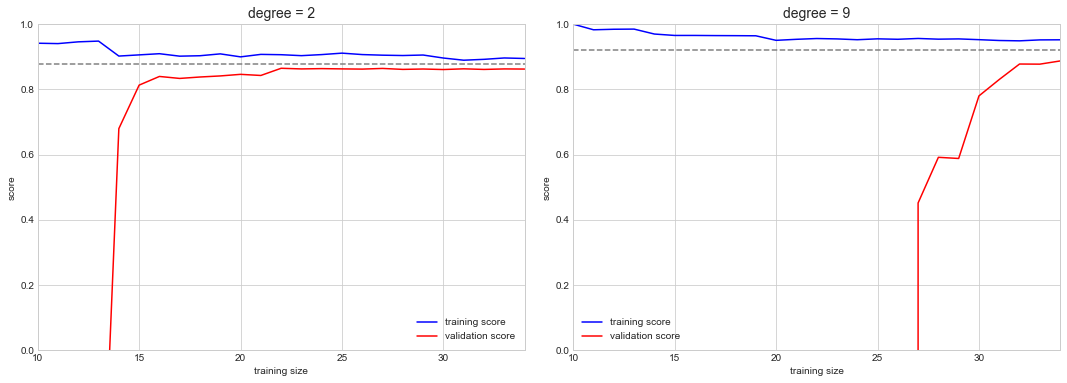

In [33]:
from sklearn.model_selection import learning_curve

# plot the figure
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                        X, y, cv=7,
                                        train_sizes=np.linspace(0.3, 1, 25))
    
    ax[i].plot(N, np.mean(train_lc, 1),
                        color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1),
            color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0],
              N[-1], color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

In [35]:
tee = [[i, j] for i, j in enumerate([2, 9])]
tee

[[0, 2], [1, 9]]

## Using grid search to find the optimal polynomial model

In practice, models generally have more than one knob to turn, meaning plots of validation and learning curves change from lines to multidimensional surfaces. In these cases, such visualizations are difficult, and we would rather simply find the particular model that maximizes the validation score.

We will explore a two-dimensional grid of model features, namely the polynomial degree and the flag telling us whether to fit the intercept. This can be set up using Scikit-Learn’s GridSearchCV meta-estimator:

In [36]:
from sklearn.model_selection import GridSearchCV

# define parameters
param_grid = {'polynomialfeatures__degree': np.arange(21),
             'linearregression__fit_intercept': [True, False]}

# create grid
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

Notice that like a normal estimator, this has not yet been applied to any data. Calling the fit method will fit the model at each grid point, keeping track of the scores along the way:

In [37]:
# fitting the meta-estimator
grid.fit(X, y);

In [38]:
# Asking for the best parameters
grid.best_params_

{'linearregression__fit_intercept': False, 'polynomialfeatures__degree': 4}

Finally, if we wish, we can use the best model and show the fit to our data using code from before 

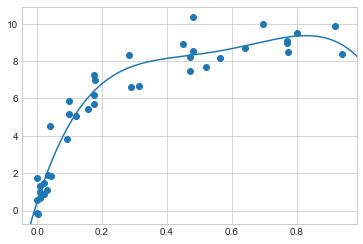

In [40]:
# plotting using the best estimator
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()

y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

# Feature Engineering

- Categorical FE with one-hot encoding like `DictVectorizer, OneHotEncoder, FeatureHasher`
- Text FE using the sklearn.feature_extraction.text library with `CountVectorizer, TfidfVectorizer`
- Image FE using pixel values
- Derived FE using `PolynomialFeatures`
- FE Pipeline using `make_pipeline`

Feature engineering:

This involves taking whatever information you have about your problem and turning it into numbers that you can use to build your feature matrix.

## Categorical Features (Factor or Groups)

One common type of nonnumerical data is categorical data. For example, imagine you are exploring some data on housing prices, and along with numerical features like “price” and “rooms,” you also have “neighborhood” information.

In [1]:
house_data = [
            {'price': 850000, 'rooms': 4, 'neighborhood': 'Queen Anne'},
            {'price': 700000, 'rooms': 3, 'neighborhood': 'Fremont'},
            {'price': 650000, 'rooms': 3, 'neighborhood': 'Wallingford'},
            {'price': 600000, 'rooms': 2, 'neighborhood': 'Fremont'}
        ]
type(house_data)

list

In [4]:
# we could decide to encode the group as a dict way
{'Queen Anne': 1, 'Fremont': 2, 'Wallingford': 3};

this is not generally a useful approach in Scikit-Learn. The package’s models make the fundamental assumption that numerical features reflect algebraic quantities, so such a mapping would imply, for example, that Queen Anne < Fremont < Wallingford, or even that Wallingford–Queen Anne = Fremont, which (niche demographic jokes aside) does not make much sense.

### One-hot Encoding

effectively creates extra columns indicating the presence or absence of a category with a value of 1 or 0, respectively. When your data takes the form of a list of dictionaries, Scikit-Learn’s DictVectorizer will do this for you:

In [5]:
# import the DictVectorizer package
from sklearn.feature_extraction import DictVectorizer
# instantiate it
vectz = DictVectorizer(sparse=False, dtype=int)
# use it to transform the data
vectz.fit_transform(house_data)

array([[     0,      1,      0, 850000,      4],
       [     1,      0,      0, 700000,      3],
       [     0,      0,      1, 650000,      3],
       [     1,      0,      0, 600000,      2]])

Notice that the neighborhood column has been expanded into three separate columns representing the three neighborhood labels, and that each row has a 1 in the column associated with its neighborhood. With these categorical features thus encoded, you can proceed as normal with fitting a Scikit-Learn model.

In [6]:
# we can inspect the features (column) name using the get_feature_names_out package
vectz.get_feature_names_out()

array(['neighborhood=Fremont', 'neighborhood=Queen Anne',
       'neighborhood=Wallingford', 'price', 'rooms'], dtype=object)

There is one clear disadvantage of this approach: if your category has many possible values, this can greatly increase the size of your dataset. However, because the encoded data contains mostly zeros, a sparse output can be a very efficient solution:

In [7]:
# using the sparse output
vectz = DictVectorizer(sparse=True, dtype=int)
vectz.fit_transform(house_data)

<4x5 sparse matrix of type '<class 'numpy.int32'>'
	with 12 stored elements in Compressed Sparse Row format>

## Text Features

Another common need in feature engineering is to convert text to a set of representative numerical values. 
- using simple word count: CountVectorizer
- using weighted word count: tfidfVectorizer

In [8]:
# using simple word count
# create sample data
sample_text = ["problem of evil",
              "evil queen",
              "horizon problem"]

#### Simple Word Count
For a vectorization of this data based on word count, we could construct individual columns representing the words “problem,” “of,” “evil,” and so on. 

In [9]:
# import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
# instantiate it
c_vec = CountVectorizer()
# fit it to the data
X = c_vec.fit_transform(sample_text)
# check it out
X

<3x5 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

The result is a sparse matrix recording the number of times each word appears; it is easier to inspect if we convert this to a DataFrame with labeled columns

In [11]:
# import pandas
import pandas as pd
# load the matrix into pandas
pd.DataFrame(X.toarray(), columns=c_vec.get_feature_names_out())  # use toarray() to convert sparse matrix to a numpy array

,evil,horizon,of,problem,queen
0,1,0,1,1,0
1,1,0,0,0,1
2,0,1,0,1,0


There are some issues with using a simple raw word count, however: it can lead to features that put too much weight on words that appear very frequently, and this can be suboptimal in some classification algorithms. One approach to fix this is known as term frequency–inverse document frequency (TF–IDF)

#### Term Frequency-Inverse Document Frequency Vectorization

This weights the word counts by a measure of how often they appear in the documents. The syntax for computing these features is similar to the Count own

In [13]:
# import the tfidf package
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(sample_text)
# convert to a pandas df
pd.DataFrame(X.toarray(), columns=tf_vec.get_feature_names_out())

,evil,horizon,of,problem,queen
0,0.517856,0.000000,0.680919,0.517856,0.000000
1,0.605349,0.000000,0.000000,0.000000,0.795961
2,0.000000,0.795961,0.000000,0.605349,0.000000


## Derived Feature

This type of feature is one that is mathematically derived from some input features. We could convert a linear regression into a polynomial regression not by changing the model, but by transforming the input!

#### Polynomial Feature

In [15]:
# create data 
import numpy as np
x = np.array([1, 2, 3, 4, 5])
y = np.array([4, 2, 1, 3, 7])

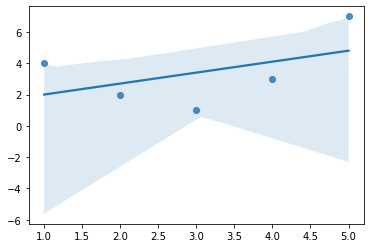

In [17]:
# plotting this data shows that a linear plot might not be the best fit
import seaborn as sns
sns.regplot(x=x, y=y);

or we could fit it using the sklearn library

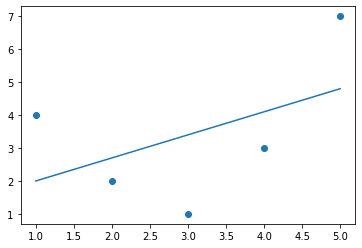

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# trandorm the axis of X from N, to N, 1
X = x[:, np.newaxis]
# fit the model
model.fit(X, y)
# use the model to predict
yfit = model.predict(X)

# plot the original point
plt.scatter(x, y)

# plot the reg line
plt.plot(x, yfit)

But it’s clear that we need a more sophisticated model to describe the relationship between and One approach to this is to transform the data, adding extra columns of features to drive more flexibility in the model. For example, we can add polynomial features to the data this way

In [25]:
X.shape

(5, 1)

In [26]:
# using Polynomail Feature
from sklearn.preprocessing import PolynomialFeatures
# instantiate with cubic polynomial without bias
poly = PolynomialFeatures(degree=3, include_bias=False)
# transfrom the data
X2 = poly.fit_transform(X)  # we are transforming the data that we already made an N x 1 array
# check it out
print(X2)

[[  1.   1.   1.]
 [  2.   4.   8.]
 [  3.   9.  27.]
 [  4.  16.  64.]
 [  5.  25. 125.]]


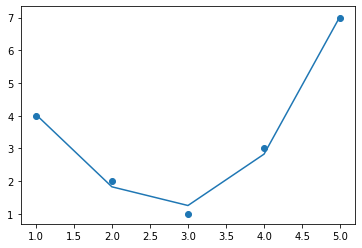

In [27]:
# fitting the new data
model = LinearRegression().fit(X2, y)
yfit = model.predict(X2)
plt.scatter(x, y)
plt.plot(x, yfit);

## Imputation of Missing Data

This involves handling missing data with packages like the `SimpleImputer`

In [29]:
# create data wit missing samples
from numpy import nan
X = np.array([
    [nan, 0, 3],
    [ 3,   7,   9  ],
    [ 3,   5,   2  ],
    [ 4,   nan, 6  ],
    [ 8,   8,   1  ]])

y = np.array([14, 16, -1,  8, -5])

In [30]:
X.shape, y.shape

((5, 3), (5,))

When applying a typical machine learning model to such data, we will need to first replace the missing values with some appropriate fill value. This is known as **imputation of missing values,** and strategies range from simple (e.g., replacing missing values with the mean of the column) to sophisticated (e.g., using matrix completion or a robust model to handle such data).

#### Simple Imputer

This is useful for a baseline imputation approach using the mean, median, or most frequent value, Scikit-Learn provides the SimpleImputer class:

In [31]:
# import libraries
from sklearn.impute import SimpleImputer
# instantiate model
imp = SimpleImputer(strategy='mean')
# transform data
X2 = imp.fit_transform(X)

X2

array([[4.5, 0. , 3. ],
       [3. , 7. , 9. ],
       [3. , 5. , 2. ],
       [4. , 5. , 6. ],
       [8. , 8. , 1. ]])

We see that in the resulting data, the two missing values have been replaced with the mean of the remaining values in the column. This imputed data can then be fed directly into, for example, a LinearRegression estimator:

In [32]:
# feeding it into the Linear Regression estimator
LinearRegression().fit(X2, y).predict(X2)

array([13.14869292, 14.3784627 , -1.15539732, 10.96606197, -5.33782027])

## Feature Pipelines

Feature pipeline allows us to string together multiple Scikit operations (like the pipeline in R). For example, we might want a processing pipeline that looks something like this:

- Impute missing values using the mean.

- Transform features to quadratic.

- Fit a linear regression model.

To streamline this type of processing pipeline, Scikit-Learn provides a Pipeline object, which can be used as follows

In [34]:
from sklearn.pipeline import make_pipeline  # import make_pipeline
model = make_pipeline(SimpleImputer(strategy='mean'),
                     PolynomialFeatures(degree=2),
                     LinearRegression())

> This pipeline looks and acts like a standard Scikit-Learn object, and will apply all the specified steps to any input data:

In [35]:
# for examplefitting our data that has a missing value can be donw in a go
model.fit(X, y)  # remember X has some missing value
print(y)
print(model.predict(X))

[14 16 -1  8 -5]
[14. 16. -1.  8. -5.]


All the steps of the model are applied automatically. 

# In Depth:Naive Bayes Classification

Naive Bayes models are a group of extremely fast and simple classification algorithms that are often suitable for very high-dimensional datasets. Because they are so fast and have so few tunable parameters, they end up being useful as a quick-and-dirty baseline for a classification problem. 

#### Naive Bayes classifiers are built on Bayesian classification methods. 

In Bayesian classification, we’re interested in finding the probability of a label 
 given some observed features, which we can write as:

$$
\ P(L | features) = \frac{P(features | L)P(L)}{P(features)}
$$

#### The “naive” in “naive Bayes”:

if we make very naive assumptions about the generative model for each label, we can find a rough approximation of the generative model for each class, and then proceed with the Bayesian classification.

#### Generative Model
A generative model is one that computes the hypothetical  random process that generates the data for each label.

Different types of naive Bayes classifiers rest on different naive assumptions about the data, and we will examine a few of these in the following sections.

## 1. Gaussian Naive Bayes

Perhaps the easiest naive Bayes classifier to understand is Gaussian naive Bayes. With this classifier, *the assumption is that data from each label is drawn from a simple Gaussian distribution.*

In [36]:
# import necessary libraries
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

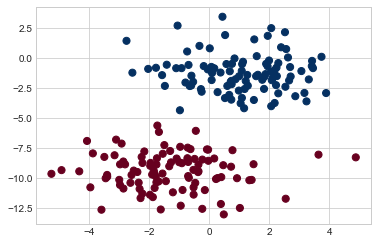

In [38]:
# create data group from sklearn dataset blob
from sklearn.datasets import make_blobs  # Generate isotropic Gaussian blobs for clustering.
X, y = make_blobs(200, 2, centers=2,
                 random_state=2, cluster_std=1.5)  # n_samples, n_features, centers, random_state. It returns X ndarray of shape (n_samples, n_features) and y ndarray of size (n_samples)

# plot the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

The simplest Gaussian model is to assume that the data is described by a Gaussian distribution with no covariance between dimensions. This model can be fit by computing the mean and standard deviation of the points within each label, which is all we need to define such a distribution.

In [39]:
# estimating the Gaussian Generative model for each label
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

Let's generate some new data points to predict the label:

In [40]:
rng = np.random.RandomState(0)
X_new = [-6, -14] + [14, 18] * rng.rand(2000, 2)

# predict the label for the test data
y_new = model.predict(X_new)

Now we can plot this new data to get an idea of where the decision boundary is

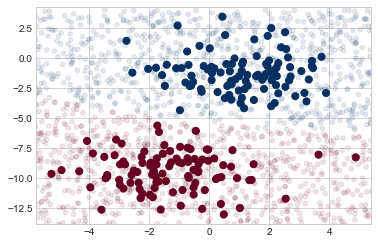

In [42]:
# plotting between the two labels or features??
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');
lim = plt.axis()
# Plot our newly predicted data
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

Our naive model was able to easily classify our new dataset. We see a slightly curved boundary in the classifications—in general, the boundary produced by a Gaussian naive Bayes model will be quadratic.

A nice aspect of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the `predict_proba` method:

In [43]:
# getting the probabilistic classification
y_prob = model.predict_proba(X_new)
# check it out
y_prob[-8:].round(2)

array([[0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ]])

In [47]:
y_prob

array([[9.44540170e-08, 9.99999906e-01],
       [2.15829848e-03, 9.97841702e-01],
       [3.20807980e-05, 9.99967919e-01],
       ...,
       [9.99997818e-01, 2.18190114e-06],
       [2.80930624e-10, 1.00000000e+00],
       [9.98431520e-01, 1.56847969e-03]])

The columns give the posterior probabilities of the first and second labels, respectively. If one is looking for estimates of uncertainty in your classification, Bayesian approaches like this can be a good place to start.

## 2. Multinomial Naive Bayes

Another useful example is multinomial naive Bayes, where the features are assumed to be generated from a simple multinomial distribution. The multinomial distribution describes the probability of observing counts among a number of categories, and thus multinomial naive Bayes is most appropriate for features that represent counts or count rates.

### Example: Classifying Text

One place where multinomial naive Bayes is often used is in text classification, where the features are related to word counts or frequencies within the documents to be classified. Here we will use the sparse word count features from the 20 Newsgroups corpus made available through Scikit-Learn to show how we might classify these short documents into categories.

In [48]:
# downloading the data and taking a look at the target names
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

For simplicity here, we will select just a few of these categories and download the training and testing sets

In [53]:
categories = ['talk.religion.misc', 'soc.religion.christian','sci.space', 'comp.graphics']

# get some hold outs
train_set = fetch_20newsgroups(subset='train', categories=categories)
test_set = fetch_20newsgroups(subset='test', categories=categories)

Looking into the data. It would be a list of arrays

In [62]:
# checking the length
len(train_set.data)

2153

In [64]:
print(train_set.data[5][48:])

Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [65]:
train_set.data?

Type:        list
String form: ["From: jono@mac-ak-24.rtsg.mot.com (Jon Ogden)\nSubject: Re: Losing your temper is not a Christi <...> ----------\nFred.McCall@dseg.ti.com - I don\'t speak for others and they don\'t speak for me.\n']
Length:      2153
Docstring:  
Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


> In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. For this we will use the TF-IDF vectorizer, and create a pipeline that attaches it to a multinomial naive Bayes classifier

In [66]:
# import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

# create a model using the pipeline
# 1. we want to vectorize our text
# 2. We want to estimate it using the Multinomial naive bayes
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

Now we will use our model to fit the data

In [74]:
# fitting the model to the data
model.fit(train_set.data, train_set.target)

# predict the y label for a new data set
labels = model.predict(test_set.data)

Now that we have predicted the labels for the test data, we can evaluate them to learn about the performance of the estimator. For example, let’s take a look at the confusion matrix between the true and predicted labels for the test data

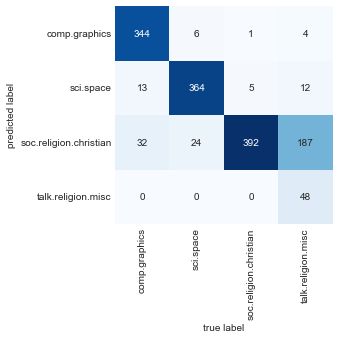

In [78]:
from sklearn.metrics import confusion_matrix
news_mat = confusion_matrix(test_set.target, labels)
sns.heatmap(news_mat.T, square=True, annot=True, fmt='d',
           cbar=False, xticklabels=train_set.target_names, yticklabels=train_set.target_names,
           cmap="Blues")

plt.xlabel('true label')
plt.ylabel('predicted label');

> Evidently, even this very simple classifier can successfully separate space discussions from computer discussions, but it gets confused between discussions about religion and discussions about Christianity.

The cool thing here is that we now have the tools to determine the category for any string, using the predict method of this pipeline. Here’s a utility function that will return the prediction for a single string:

In [86]:
def predict_category(text, train_set=train_set, model=model):
    """This function will predict the category of the text variable among any of the selected categories on which our model was trained"""
    pred = model.predict([text])
    return train_set.target_names[pred[0]]

Lets try it out by predicting the category of some text

In [87]:
predict_category("In the Beginning Was The Word")

'soc.religion.christian'

In [88]:
predict_category('sending a payload to the ISS')

'sci.space'

In [89]:
predict_category('determining the screen resolution')

'comp.graphics'

In [90]:
predict_category('Love does not cost a thing they say')

'soc.religion.christian'

Remember that this is nothing more sophisticated than a simple probability model for the (weighted) frequency of each word in the string; nevertheless, the result is striking.

In [91]:
sns.heatmap?

Signature:
sns.heatmap(
    data,
    *,
    vmin=None,
    vmax=None,
    cmap=None,
    center=None,
    robust=False,
    annot=None,
    fmt='.2g',
    annot_kws=None,
    linewidths=0,
    linecolor='white',
    cbar=True,
    cbar_kws=None,
    cbar_ax=None,
    square=False,
    xticklabels='auto',
    yticklabels='auto',
    mask=None,
    ax=None,
    **kwargs,
)
Docstring:
Plot rectangular data as a color-encoded matrix.

This is an Axes-level function and will draw the heatmap into the
currently-active Axes if none is provided to the ``ax`` argument.  Part of
this Axes space will be taken and used to plot a colormap, unless ``cbar``
is False or a separate Axes is provided to ``cbar_ax``.

Parameters
----------
data : rectangular dataset
    2D dataset that can be coerced into an ndarray. If a Pandas DataFrame
    is provided, the index/column information will be used to label the
    columns and rows.
vmin, vmax : floats, optional
    Values to anchor the colormap, otherwise

# In Depth:Linear Regression

Just as naive Bayes (discussed in Chapter 41) is a good starting point for classification tasks, linear regression models are a good starting point for regression tasks. Such models are popular because they can be fit quickly and are straightforward to interpret.

### Simple Linear Regression
Involves fitting a straight line to a data. A simple straight-line fit is a model of the form:
$$
y = ax + b
$$

a is the slope, and b is the intercept

Consider the following data, which is scattered about a line with **a slope of 2 and an intercept of –5**

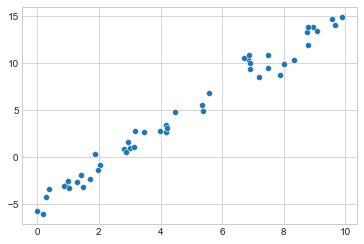

In [93]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
# create y using our simple model
y = 2 * x - 5 + rng.randn(50)  # random number from a normal distribution

# plot the data
sns.scatterplot(x=x, y=y);

We can use Scikit-Learn’s LinearRegression estimator to fit this data and construct the best-fit line

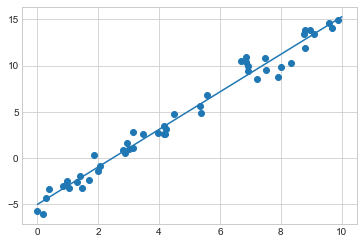

In [94]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)

# create new data to test on
xfit = np.linspace(0, 10, 1000)

# predict new set
yfit = model.predict(xfit[:, np.newaxis])

# plot the data
plt.scatter(x, y)
# plot the fitted line
plt.plot(xfit, yfit);

The slope and intercept of the data are contained in the model’s fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are coef_ and intercept_:

In [95]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.027208810360695
Model intercept: -4.998577085553202


In [96]:
model.coef_

array([2.02720881])

We see that the results are very close to the values used to generate the data, as we might hope.

#### Multidimensional Linear Models

The linear regression model can also handle multidimensional linear models in the form
$$
y = a_0 + a_1x_1 + a_2x_2 + ...
$$

where there are multiple values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyperplane to points in higher dimensions.

In [97]:
# modeling such multidimensional model
rng = np.random.RandomState(1)  # random number generator
X = 10 * rng.rand(100, 3)  # creating a 2D sample dataset with 100 samples and 3 features
# creating our label using all dim
y = 0.5 + np.dot(X, [1.5, -2, 1.])  # for a model where intercept is 0.5, and slope for a1,2, 3 are 1.5, -2, and 1 respectively

# fit our model
model.fit(X, y)
# check it out
print(model.coef_)  # getting our coefficients
print(model.intercept_)

[ 1.5 -2.   1. ]
0.5000000000000102


#### Basis Function Regression

One trick you can use to adapt linear regression to nonlinear relationships between variables is to transform the data according to basis functions.

Consider that we have a polynomial model where:
$$ y = a_0 + a_1x + a_2x^2 + a_3x^3 + ... $$

We can estimate the labels and data using the Polynomial Projection feature of ScikitLearn

#### Polynomial Basis Function


In [98]:
# import poly feature
from sklearn.preprocessing import PolynomialFeatures
# create a 1D array
x = np.arange(2, 5)
# transform into polynomial of degree 3
poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit_transform(x[:, np.newaxis])

array([[ 2.,  4.,  8.],
       [ 3.,  9., 27.],
       [ 4., 16., 64.]])

In [99]:
# using the pipeline functionality
from sklearn.pipeline import make_pipeline
poly_model = make_pipeline(PolynomialFeatures(7),
                          LinearRegression())

With this transform in place, we can use the linear model to fit much more complicated relationships between and 
. For example, here is a sine wave with noise

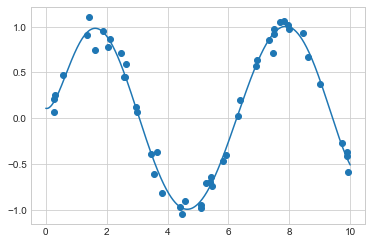

In [101]:
x = 10 * rng.rand(50)
y = np.sin(x) + 0.1 * rng.randn(50)

poly_model.fit(x[:, None], y)

yfit = poly_model.predict(xfit[:, None])

# plot the data
plt.scatter(x, y)
plt.plot(xfit, yfit)

#### Gaussian Basis Functions

Gaussian basis functions are not built into Scikit-Learn, but we can write a custom transformer that will create them, as shown here 

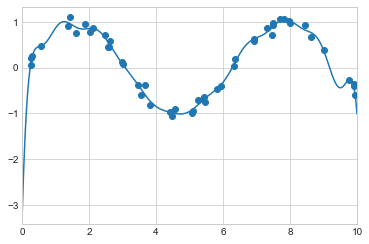

In [103]:
# creating a Gaussian Basis Estimator
from sklearn.base import BaseEstimator, TransformerMixin

class GaussianFeatures(BaseEstimator, TransformerMixin):
    """Uniformly spaced Gaussian features for one-dimensional input"""
    def __init__(self, N, width_factor=2.0):
        self.N = N
        self.width_factor = width_factor
        
    @staticmethod
    def _gauss_basis(x, y, width, axis=None):
        arg = (x - y) / width
        return np.exp(-0.5 * np.sum(arg ** 2, axis))
    
    def fit(self, X, y=None):
        # create N centers spread along the data range
        self.centers_ = np.linspace(X.min(), X.max(), self.N)
        self.width_ = self.width_factor*(self.centers_[1]-self.centers_[0])
        return self
    
    def transform(self, X):
        return self._gauss_basis(X[:, :, np.newaxis], self.centers_,
                                self.width_, axis=1)

gauss_model = make_pipeline(GaussianFeatures(20),
                           LinearRegression())
gauss_model.fit(x[:, None], y)
yfit = gauss_model.predict(xfit[:, None])

# plotting
plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.xlim(0, 10);

#### Regularization

The introduction of basis functions into our linear regression makes the model much more flexible, but it also can very quickly lead to overfitting. For example, if we were to use a large number of Gaussian Basis Function... we would have an overfitted model

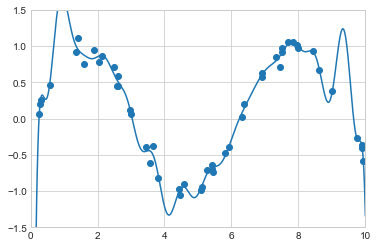

In [104]:
model = make_pipeline(GaussianFeatures(30),
                     LinearRegression())

model.fit(x[:, None], y)

plt.scatter(x, y)
plt.plot(xfit, model.predict(xfit[:, None]))

plt.xlim(0, 10)
plt.ylim(-1.5, 1.5);

With the data projected to the 30-dimensional basis, the model has far too much flexibility and goes to extreme values between locations where it is constrained by data.

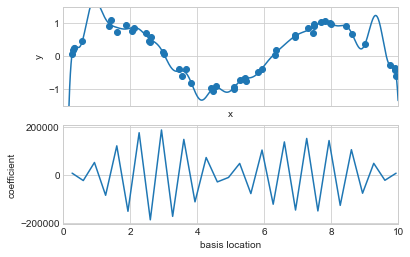

In [107]:
def basis_plot(model, title=None):
    
    fig, ax = plt.subplots(2, sharex=True)
    model.fit(x[:, np.newaxis], y)
    ax[0].scatter(x, y)
    ax[0].plot(xfit, model.predict(xfit[:, np.newaxis]))
    ax[0].set(xlabel='x', ylabel='y', ylim=(-1.5, 1.5))

    if title:
        ax[0].set_title(title)

    ax[1].plot(model.steps[0][1].centers_, model.steps[1][1].coef_)
    ax[1].set(xlabel='basis location', ylabel='coefficient', xlim=(0, 10))

model = make_pipeline(GaussianFeatures(30), LinearRegression())
basis_plot(model)

#### Ridge Regression ($L_2$ Regularization)

Perhaps the most common form of regularization is known as ridge regression $L_2$ regularization (sometimes also called Tikhonov regularization). This proceeds by penalizing the sum of squares (2-norms) of the model coefficients $\theta_n$.

The penalty on the model fit would be:

$$P = \alpha \sum_{n=1}^N {\theta_n}^2$$

where $\alpha$ is a free parameter that controls the strength of the penalty. This type of penalized model is built into Scikit-Learn with the Ridge estimator

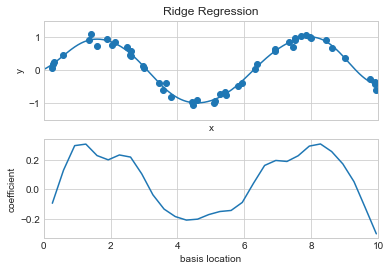

In [108]:
from sklearn.linear_model import Ridge
model = make_pipeline(GaussianFeatures(30), Ridge(alpha=0.1))
basis_plot(model, title="Ridge Regression")

The $\alpha$  parameter is essentially a knob controlling the complexity of the resulting model. In the limit 
, we recover the standard linear regression result; in the limit 
, all model responses will be suppressed.

#### Lasso Regression ($L_1$ Regularization)

Another common type of regularization is known as lasso regression or $L_1$ regularization and involves penalizing the sum of absolute values (1-norms) of regression coefficients

$$P = \alpha \sum_{n=1}^N |{\theta_n}|$$

Though this is conceptually very similar to ridge regression, the results can differ surprisingly. For example, due to its construction, lasso regression tends to favor sparse models where possible: that is, it preferentially sets many model coefficients to exactly zero

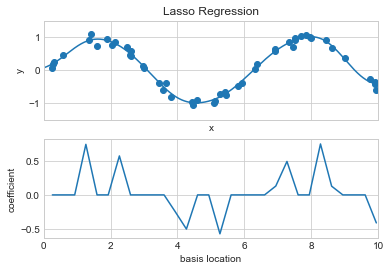

In [109]:
# Example
from sklearn.linear_model import Lasso
model = make_pipeline(GaussianFeatures(30),
                     Lasso(alpha=0.001, max_iter=2000))
basis_plot(model, title='Lasso Regression')

As with ridge regularization, the $\alpha$ parameter tunes the strength of the penalty and should be determined via, for example, cross-validation 

### Example: Predicting Bicycle Traffic